In [1]:
# import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
# import data
data = pd.read_csv('parkinsons.data')

In [3]:
# split data to X and y
X = data.drop(['name','status'],axis=1)
# Check unique values in the 'status' column
y = data['status']

In [4]:
# split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=7,stratify=y_train_val)


In [5]:
# scale the numerical features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [6]:
# Define hyperparameter grid for tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=7)

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [7]:
# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Confusion Matrix:\n", val_conf_matrix)
print("Validation Classification Report:\n", val_class_report)

Validation Accuracy: 0.79
Validation Confusion Matrix:
 [[ 3  4]
 [ 2 19]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.83      0.90      0.86        21

    accuracy                           0.79        28
   macro avg       0.71      0.67      0.68        28
weighted avg       0.77      0.79      0.77        28



In [8]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

Test Accuracy: 0.90
Test Confusion Matrix:
 [[11  4]
 [ 2 42]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



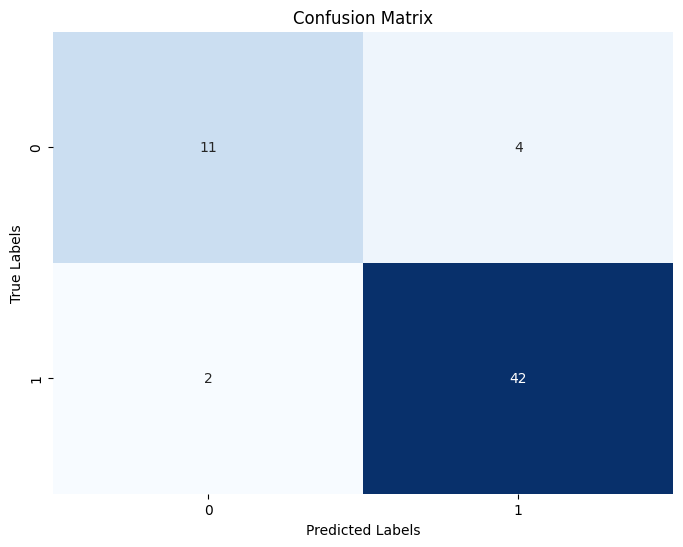

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

[Text(0.6363636363636364, 0.9, 'Jitter:DDP <= 0.005\nentropy = 0.796\nsamples = 108\nvalue = [26, 82]\nclass = 1'),
 Text(0.45454545454545453, 0.7, 'MDVP:Flo(Hz) <= 180.185\nentropy = 0.949\nsamples = 38\nvalue = [24, 14]\nclass = 0'),
 Text(0.36363636363636365, 0.5, 'MDVP:Fo(Hz) <= 133.587\nentropy = 0.996\nsamples = 26\nvalue = [12, 14]\nclass = 1'),
 Text(0.18181818181818182, 0.3, 'MDVP:Flo(Hz) <= 109.403\nentropy = 0.619\nsamples = 13\nvalue = [11, 2]\nclass = 0'),
 Text(0.09090909090909091, 0.1, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 0'),
 Text(0.2727272727272727, 0.1, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 0'),
 Text(0.5454545454545454, 0.3, 'Shimmer:APQ3 <= 0.008\nentropy = 0.391\nsamples = 13\nvalue = [1, 12]\nclass = 1'),
 Text(0.45454545454545453, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1'),
 Text(0.6363636363636364, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = 1'),
 Text(0.5454545454545454, 0.5, 'entropy = 0.0\ns

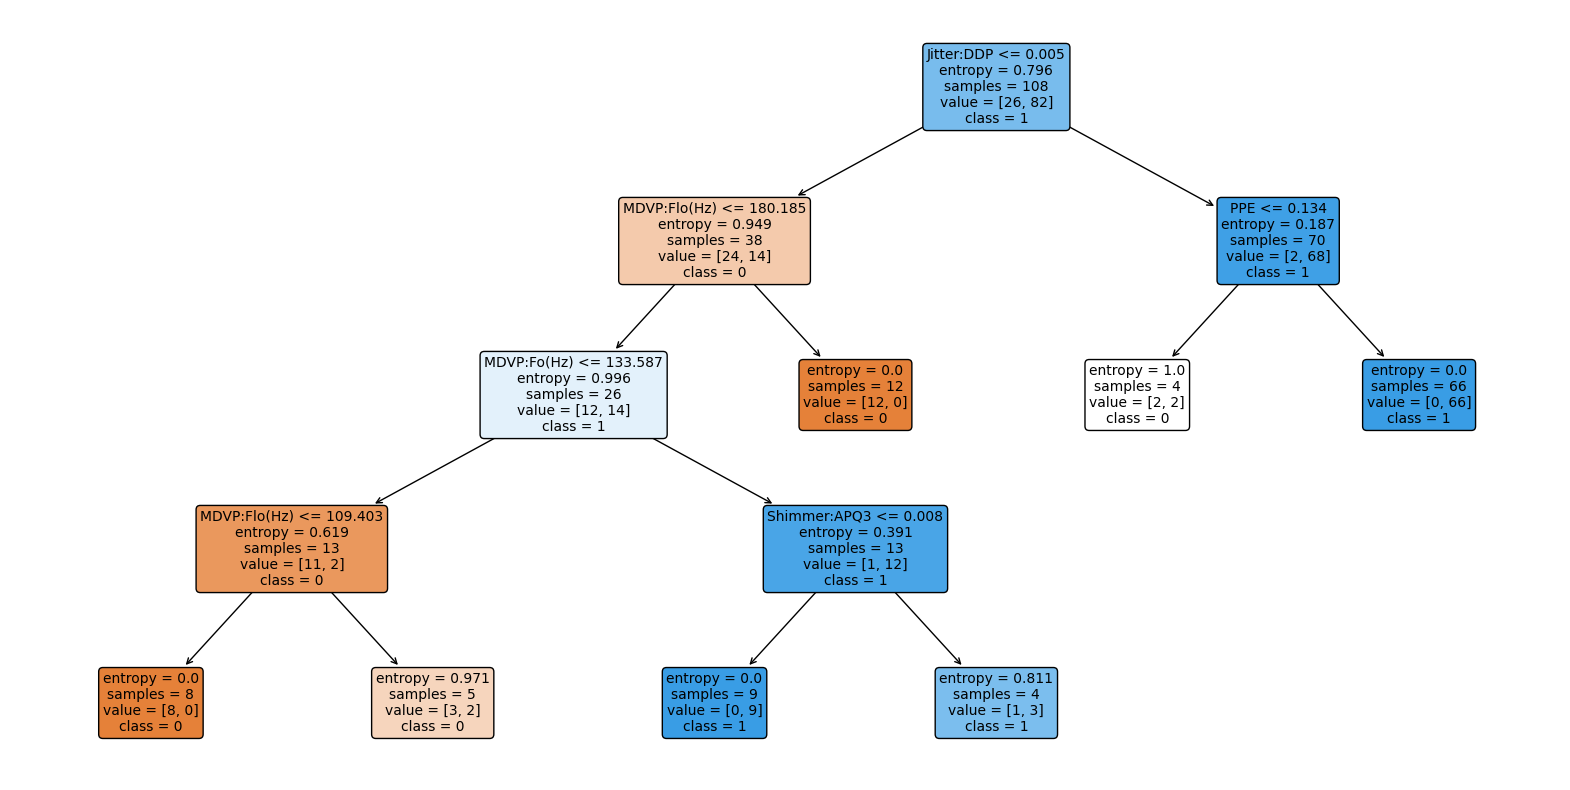

In [10]:
# U svakom čvora stabla naveden je test, zatim vrednost korišćene mere homogenosti, 
# ukupan broj instaci koji je analiziran, kao i broj instanci po klasama. 

plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, fontsize=10, feature_names=list(X.keys()), filled=True, rounded=True, class_names=['0','1'])

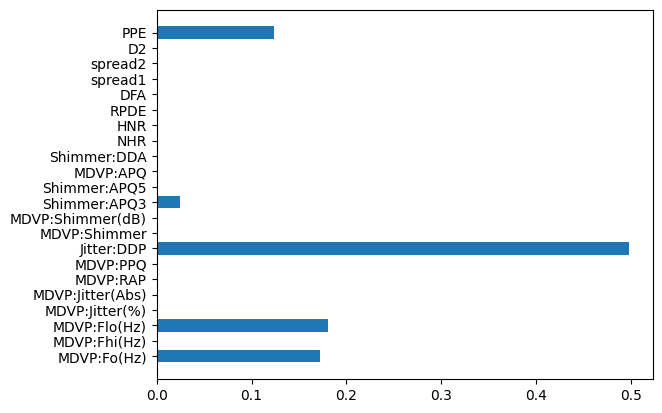

In [11]:
# Importance of features

plt.barh(list(X.keys()), best_model.feature_importances_)
plt.show()

In [12]:
# Save model
import pickle

with open('models/decision_tree.model.pickle', 'wb') as model_file:
    pickle.dump(best_model, model_file)
    
with open('models/decision_tree.scaler.pickle', 'wb') as model_file:
    pickle.dump(scaler, model_file)